In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda


In [3]:
mean=4
n=5
sigma=0.2
ARL=200
alpha=1/ARL
K_alpha=stats.norm.ppf(1-alpha/2)
# Xbar chart
X_CL=mean
X_UCL=mean+K_alpha*sigma/np.sqrt(n)
X_LCL=mean-K_alpha*sigma/np.sqrt(n)
# S Chart
c4=qda.constants.getc4(n)
B6=c4+K_alpha*np.sqrt(1-c4*c4)
B5=c4-K_alpha*np.sqrt(1-c4*c4)

S_CL=c4*sigma
S_UCL=B6*sigma
S_LCL=B5*sigma

> ## Point 2

In [5]:
data_XS=np.zeros((5,2))
data_XS[:,0]=np.array((4.0738,3.9406,4.0430,3.9968,3.829))
data_XS[:,1]=np.array((0.1638,0.2148,0.1711,0.1312,0.1555))
data_XS=pd.DataFrame(data_XS,columns=['sample_mean','sample_std'])

In [6]:
Xbar_mean = data_XS['sample_mean'].mean()
S_mean = data_XS['sample_std'].mean()

print('Mean of the sample mean: %.3f' % Xbar_mean)
print('Mean of the sample range: %.3f' % S_mean)

Mean of the sample mean: 3.977
Mean of the sample range: 0.167


In [7]:
data_XS['Xbar_UCL']=X_UCL
data_XS['Xbar_LCL']=X_LCL
data_XS['Xbar_CL']=X_CL

data_XS['S_UCL']=S_UCL
data_XS['S_LCL']=S_LCL
data_XS['S_CL']=S_CL

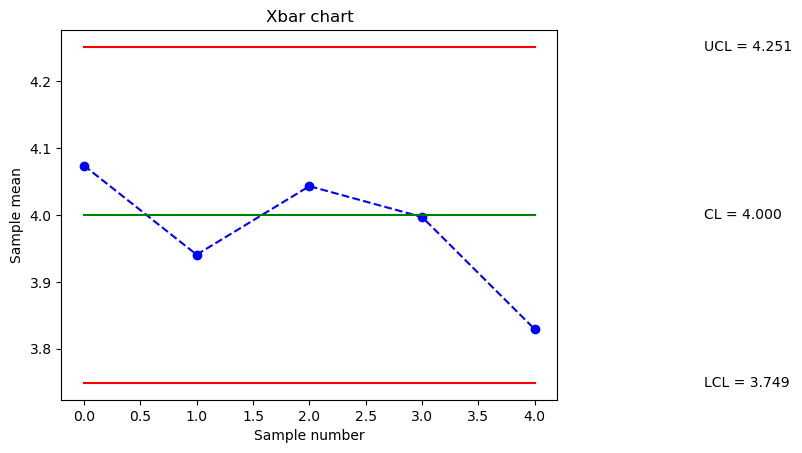

In [8]:
# Plot the Xbar chart
plt.title('Xbar chart')
plt.plot(data_XS['sample_mean'], color='b', linestyle='--', marker='o')
plt.plot(data_XS['Xbar_UCL'], color='r')
plt.plot(data_XS['Xbar_CL'], color='g')
plt.plot(data_XS['Xbar_LCL'], color='r')
plt.ylabel('Sample mean')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XS)+.5, data_XS['Xbar_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XS['Xbar_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XS)+.5, data_XS['Xbar_CL'].iloc[0], 'CL = {:.3f}'.format(data_XS['Xbar_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XS)+.5, data_XS['Xbar_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XS['Xbar_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.show()

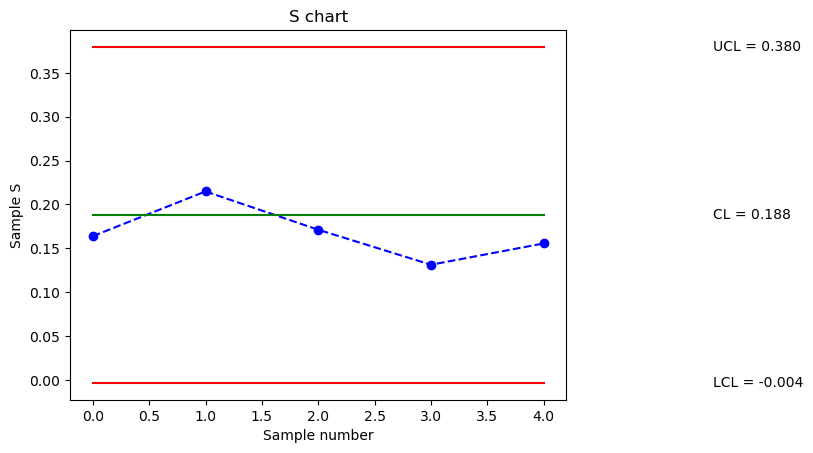

In [9]:
# Plot the S chart
plt.title('S chart')
plt.plot(data_XS['sample_std'], color='b', linestyle='--', marker='o')
plt.plot(data_XS['S_UCL'], color='r')
plt.plot(data_XS['S_CL'], color='g')
plt.plot(data_XS['S_LCL'], color='r')
plt.ylabel('Sample S')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XS)+.5, data_XS['S_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XS['S_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XS)+.5, data_XS['S_CL'].iloc[0], 'CL = {:.3f}'.format(data_XS['S_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XS)+.5, data_XS['S_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XS['S_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.show()

>## Point 3

In [11]:
beta=stats.chi2.cdf((n-1)*S_UCL*S_UCL/(sigma*sigma),n-1)-stats.chi2.cdf((n-1)*S_LCL*S_LCL/(sigma*sigma),n-1)
alhpa_new=1-beta
ARL_new=1/alhpa_new
error=ARL_new-ARL
errorpercent=(ARL_new-ARL)/ARL
print(error)
print(errorpercent)

-36.20391509917519
-0.18101957549587597


> ## point 4

In [12]:
n=np.array((2,5,10,20,50))

In [14]:
C4=np.zeros(5)
B6=np.zeros(5)
B5=np.zeros(5)
Xbar_CL=np.zeros(5)
Xbar_UCL=np.zeros(5)
Xbar_LCL=np.zeros(5)
S_CL=np.zeros(5)
S_UCL=np.zeros(5)
S_LCL=np.zeros(5)
lower=np.zeros(5)
upper=np.zeros(5)
beta=np.zeros(5)
alpha_new=np.zeros(5)
ARL_new=np.zeros(5)
error=np.zeros(5)

ARL=200
alpha=1/ARL
k = stats.norm.ppf(1-alpha/2)
for i in range(5):     
    C4[i] = qda.constants.getc4(n[i])
    B6[i] = C4[i]+k*np.sqrt(1-C4[i]*C4[i])
    B5[i] = C4[i]-k*np.sqrt(1-C4[i]*C4[i])
# Now we can compute the CL, UCL and LCL for Xbar and S
    Xbar_CL[i] = mean
    Xbar_UCL[i] = mean+k*sigma/np.sqrt(n[i])
    Xbar_LCL[i] = mean-k*sigma/np.sqrt(n[i])

    S_CL[i] = C4[i]*sigma
    S_UCL[i] = B6[i]*sigma
    S_LCL[i]= B5[i]*sigma

    lower[i]=(n[i]-1)*S_LCL[i]*S_LCL[i]/(sigma*sigma)
    upper[i]=(n[i]-1)*S_UCL[i]*S_UCL[i]/(sigma*sigma)  

    beta[i]=stats.chi2.cdf(upper[i],n[i]-1)-stats.chi2.cdf(lower[i],n[i]-1)
    alpha_new[i]=1-beta[i]
    ARL_new[i]=1/alpha_new[i]
    error[i]=(ARL-ARL_new[i])/ARL 

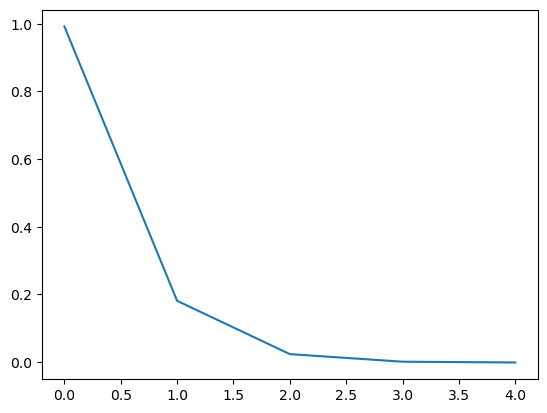

In [16]:
plt.plot(error)
plt.show()

> ## point 5

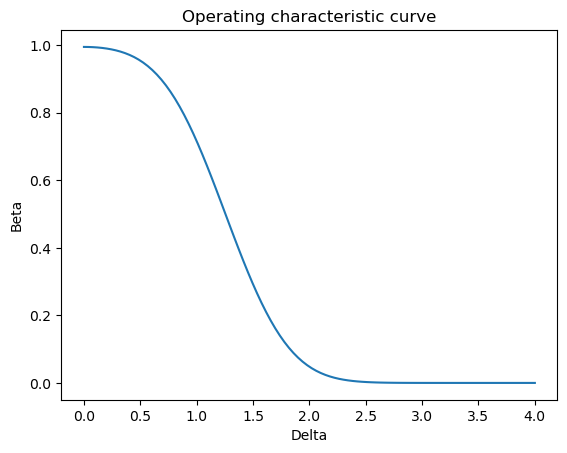

0.7159883549023556
0.04794618528069895
4.786441418335139e-05


In [18]:
# Define a range of values for beta
n=5
delta = np.linspace(0, 4, 100)
# Compute the corresponding beta values
beta = stats.norm.cdf(k - delta*np.sqrt(n)) - stats.norm.cdf(-k - delta*np.sqrt(n))

# Plot the beta values
plt.plot(delta, beta)
plt.xlabel('Delta')
plt.ylabel('Beta')
plt.title('Operating characteristic curve')
plt.show()

beta_1 = stats.norm.cdf(k - 1*np.sqrt(n)) - stats.norm.cdf(-k - 1*np.sqrt(n))
beta_2 = stats.norm.cdf(k - 2*np.sqrt(n)) - stats.norm.cdf(-k - 2*np.sqrt(n))
beta_3 = stats.norm.cdf(k - 3*np.sqrt(n)) - stats.norm.cdf(-k - 3*np.sqrt(n))
print(beta_1)
print(beta_2)
print(beta_3)